In [8]:
from pathlib import Path
from model import TSPNet
from utils import cost, draw
import matplotlib.pyplot as plt
import os
import yaml
import torch

%matplotlib inline

In [9]:
dtype = torch.float
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

files = Path("results/checkpoints/").iterdir()
checkpoint = torch.load(max(files, key=os.path.getctime), map_location=device)


args = checkpoint["args"]

model = TSPNet(
    args["embed_size"],
    args["num_heads"],
    reg=2,
    niters=100,
    greedy=False,
).to(device)
model.load_state_dict(checkpoint["model"])

<All keys matched successfully>

18


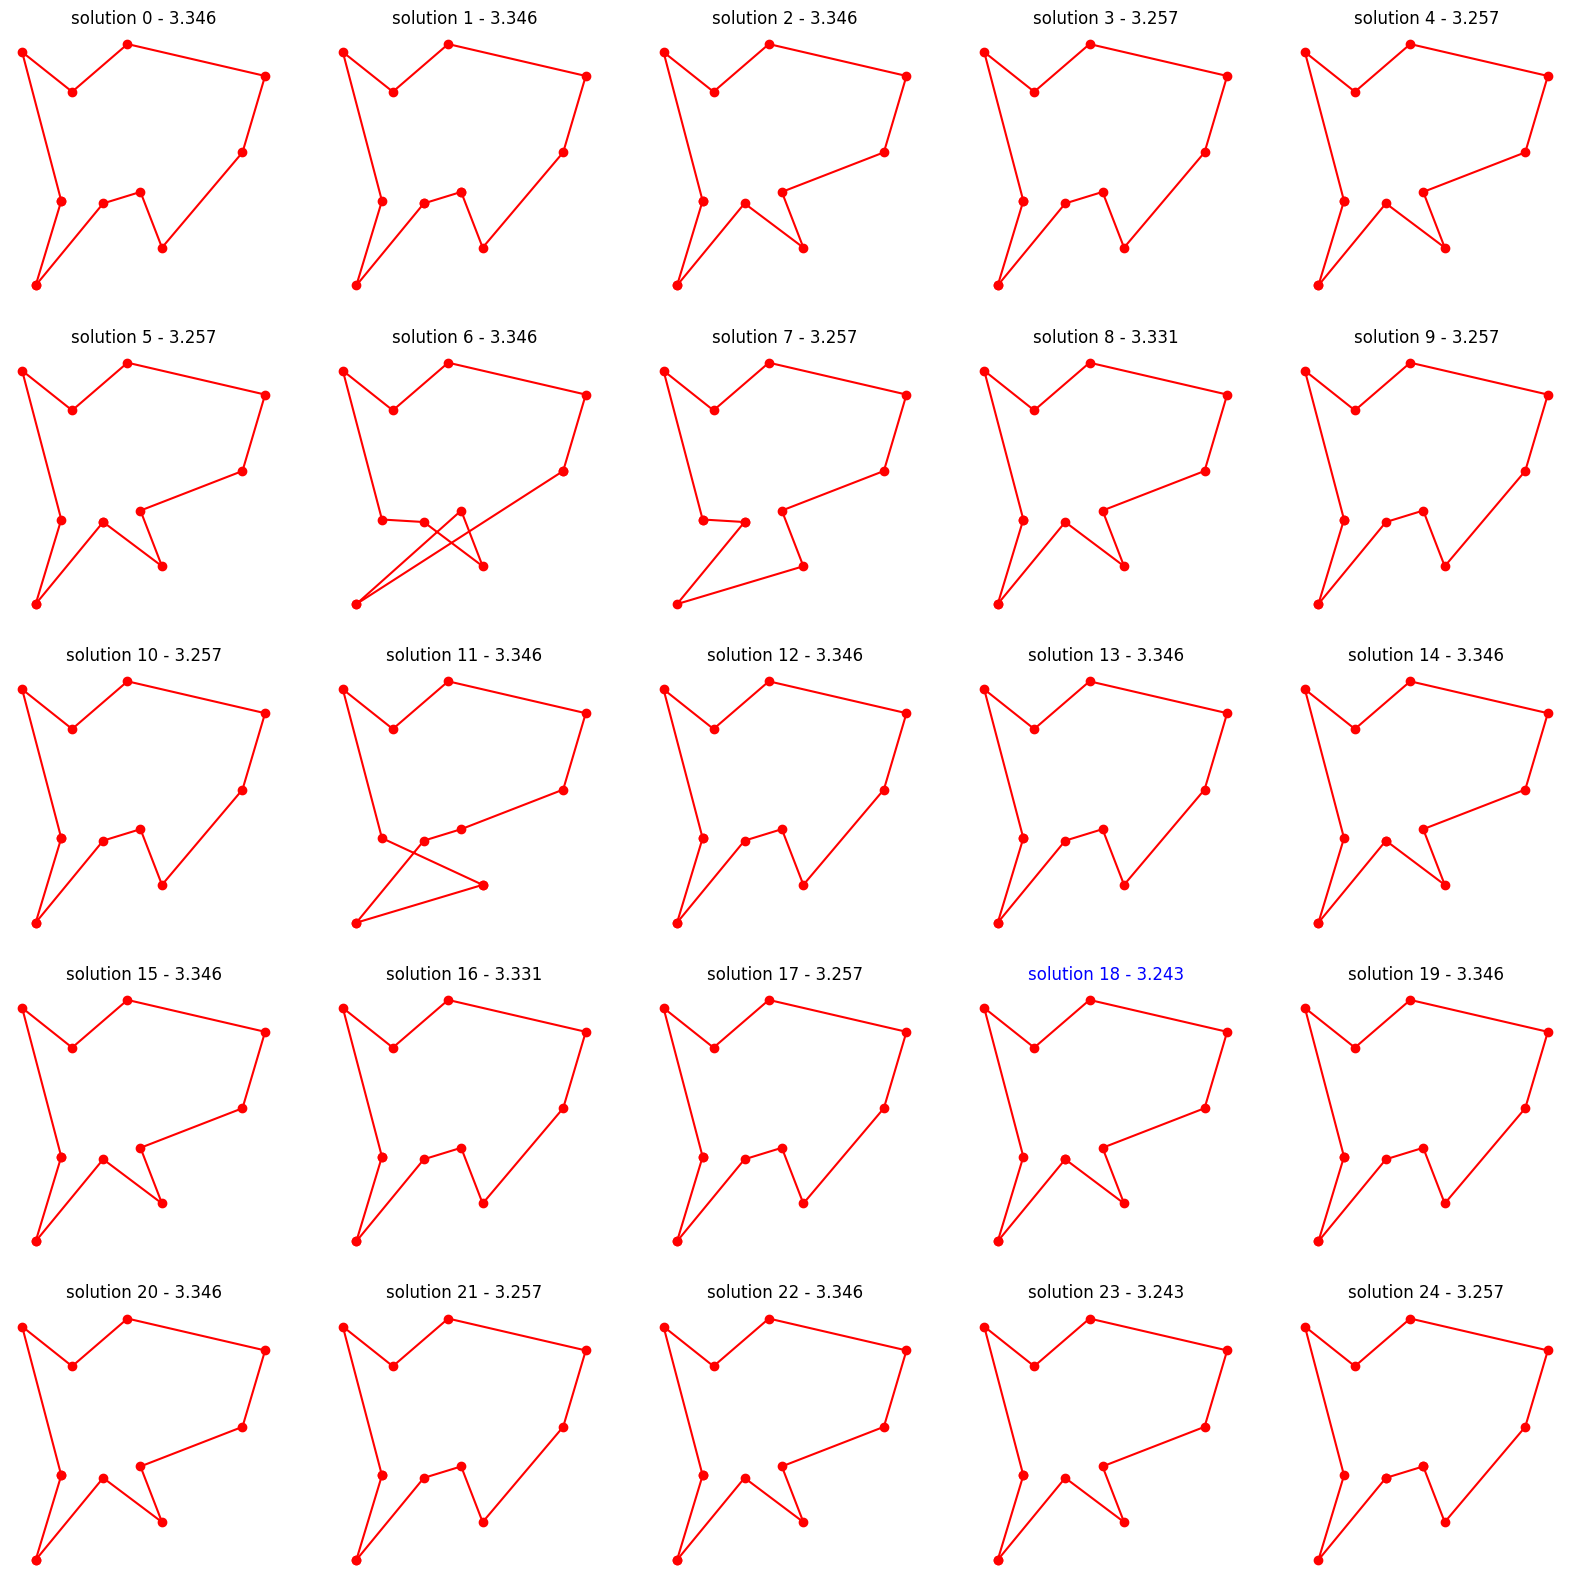

In [10]:
x = torch.rand(size=(args["num_nodes"], 2), dtype=dtype, device=device).unsqueeze(0)

nrows, ncols = 5, 5
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
solution, costs = [], []
for index, ax in enumerate(axs.flat):
    solution.append(model(x)[0])
    costs.append(cost(x, model(x)[0]).item())

best = min(costs)
best_solution = costs.index(best)
print(best_solution)
for index, ax in enumerate(axs.flat):
    draw(x, solution[index], ax)
    if index == best_solution:
        ax.set_title("solution {} - {:.3f}".format(index, costs[index]), color="blue")
    else:
        ax.set_title("solution {} - {:.3f}".format(index, costs[index]), color="black")

plt.savefig("./results/{}_samples_viz_.jpg".format(nrows * ncols))
plt.show()